In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("Retail Sales Data.csv", encoding = "unicode escape")

In [77]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [66]:
df.isnull().sum()
#check for null values in data

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [68]:
df.drop(['Status', 'unnamed1'], axis =1, inplace =True)
#remove blank columns

In [67]:
df.dropna(inplace =True)
#remove null values

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [28]:
df[['Age', 'Marital_Status', 'Amount']].describe()

,Age,Marital_Status,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,9453.610553
std,12.753866,0.493589,5222.355168
min,12.000000,0.000000,188.000000
25%,27.000000,0.000000,5443.000000
50%,33.000000,0.000000,8109.000000
75%,43.000000,1.000000,12675.000000
max,92.000000,1.000000,23952.000000


# Exploratory Data Analysis

### Gender wise Analysis

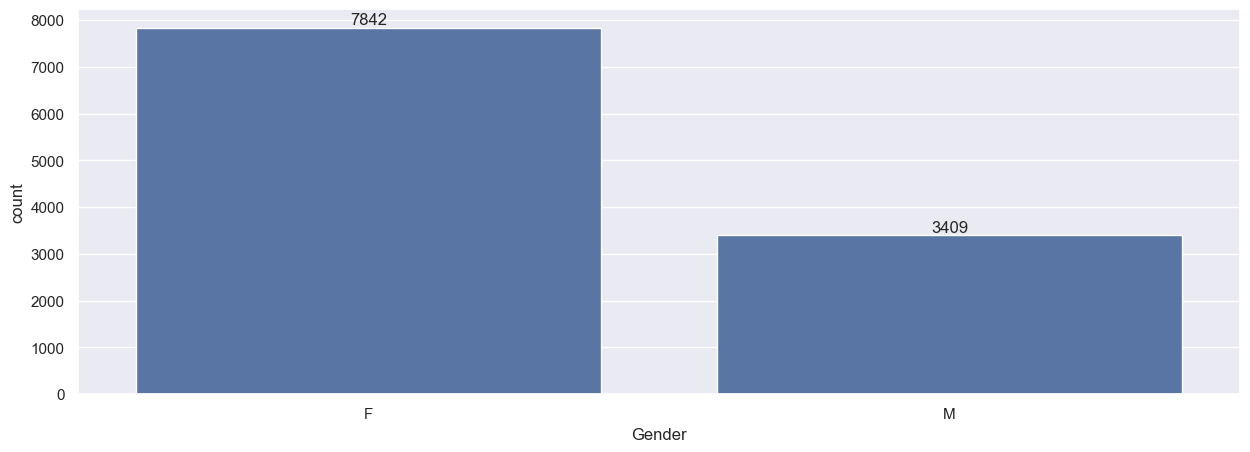

In [78]:
# plotting a bar chart for number of orders Gender wise
ax =sns.countplot(x = 'Gender', data =df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

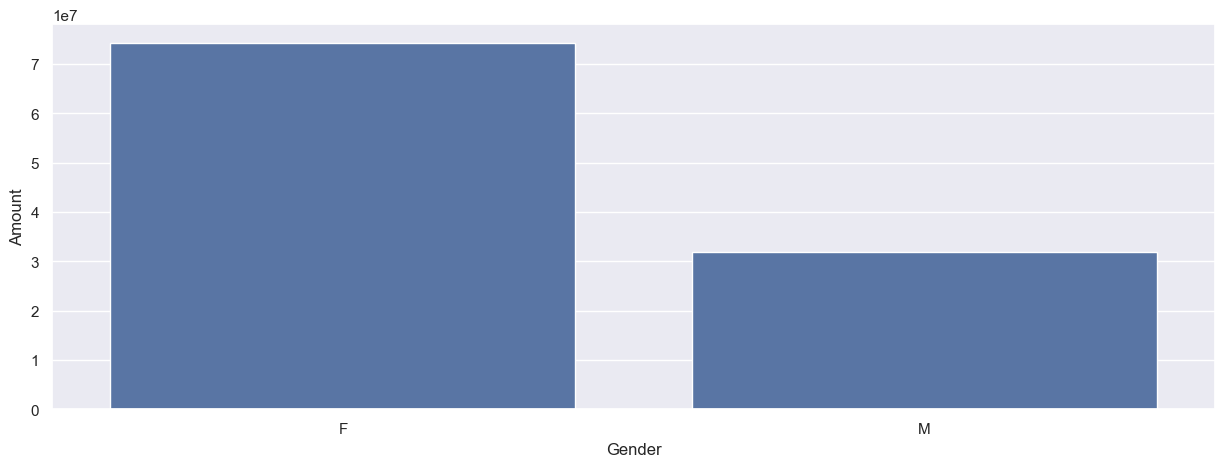

In [79]:
# plotting bar char for Amount spent Gender wise
sales_gen = df.groupby(['Gender'], as_index =False)['Amount'].sum().sort_values(by='Amount', ascending =False)
sns.barplot(x ='Gender', y = 'Amount', data =sales_gen)

 #### We can conclude that most of the buyers are Females and they have more purchasing power.

### Age wise Analysis

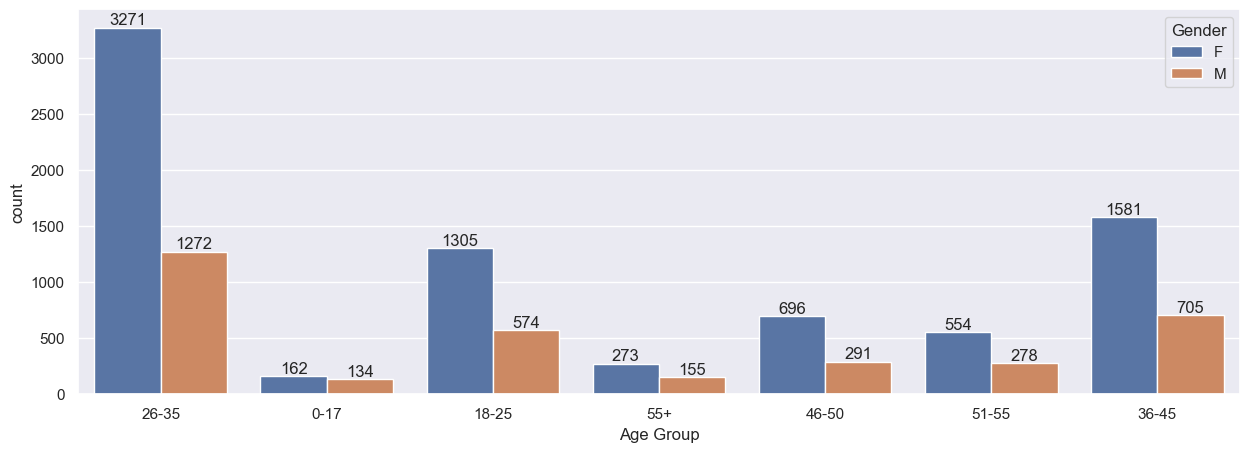

In [80]:
# plotting a bar graph for number of orders vs Age Group (Gender wise)
ax =sns.countplot(x = 'Age Group', data =df, hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

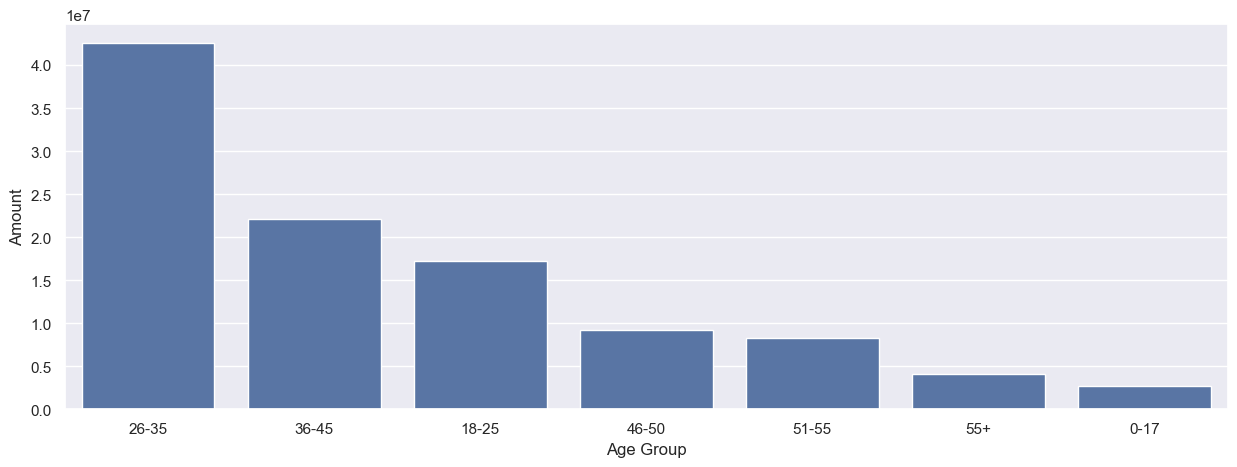

In [81]:
# plotting a bar graph for Amount spent vs Age Group
sales_age = df.groupby(['Age Group'], as_index =False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x ='Age Group', y = 'Amount', data =sales_age)

#### We can conclude that most of the buyers are of Age Group 26-35 and Females.

### State wise Analysis

<Axes: xlabel='State', ylabel='Orders'>

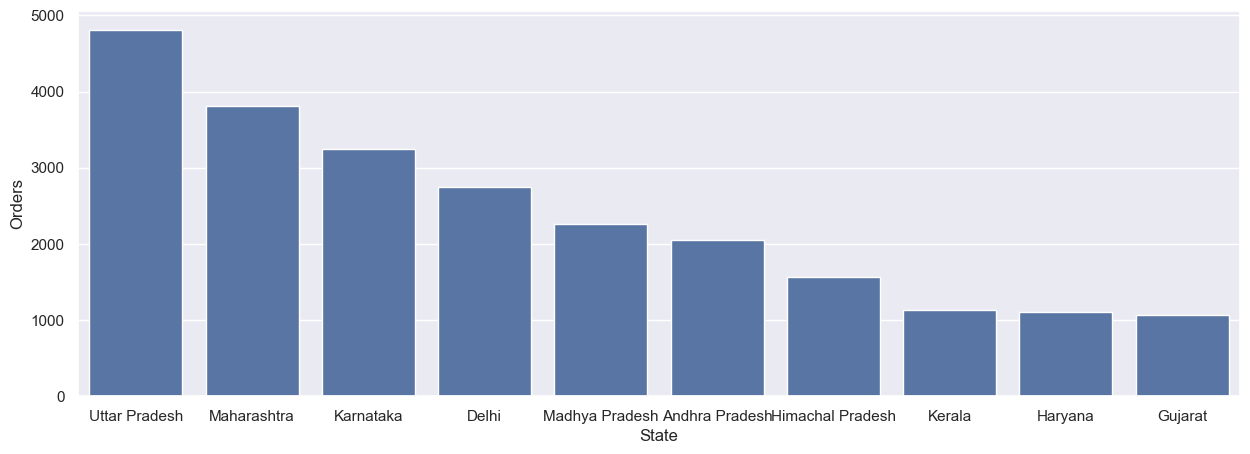

In [82]:
# plotting bar chart for number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

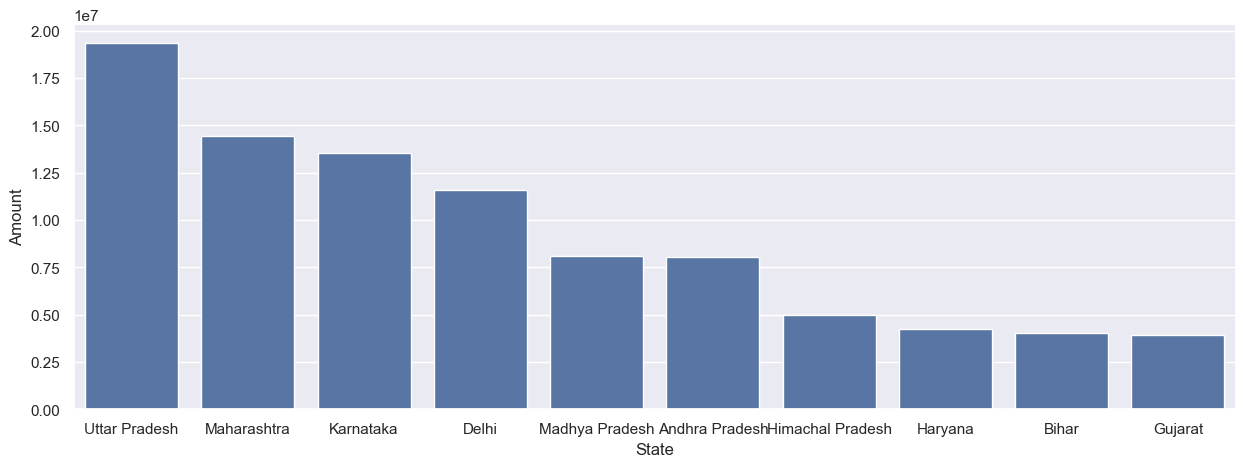

In [83]:
# plotting bar graph for Total Amount from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

#### We can conclude that number of orders and order values are highest for Uttar Pradesh, Maharasthra, and Karnataka respectively.

### Analysis on Marital Status

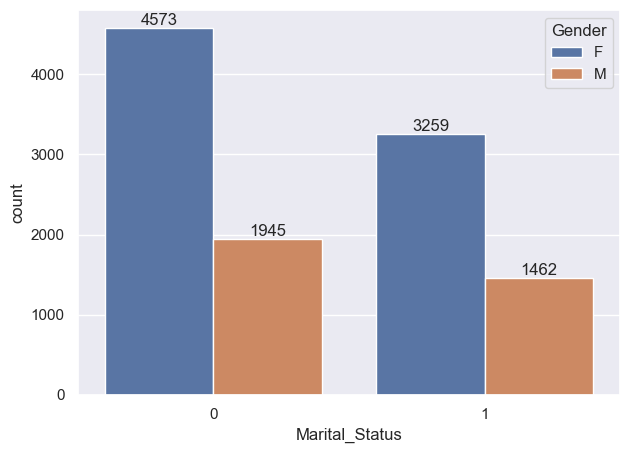

In [57]:
# plotting bar graph for number of orders against Marital Status(Gender Wise)
ax = sns.countplot(data = df, x = 'Marital_Status', hue ='Gender')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

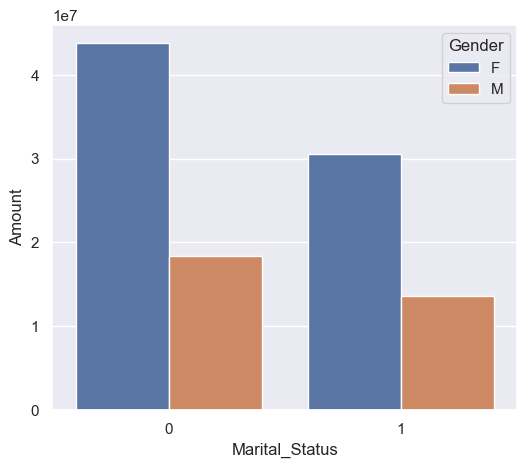

In [59]:
# plotting a bar graph for total Amount against Marital Status(Gender wise)
sales_marital = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_marital, x = 'Marital_Status',y= 'Amount', hue='Gender')

#### We can conclude that most of the buyers are Married Women and they also have higher purchasing power.

### Analysis on Occupation

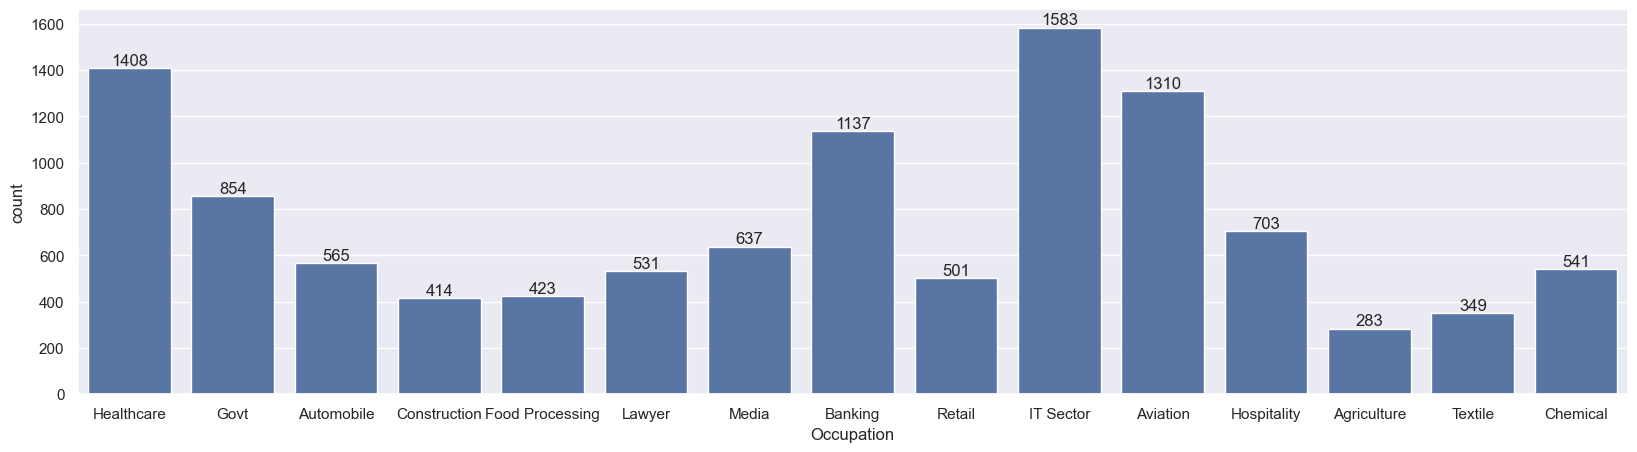

In [60]:
# plotting a bar graph for Number of Orders vs Occupation 
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

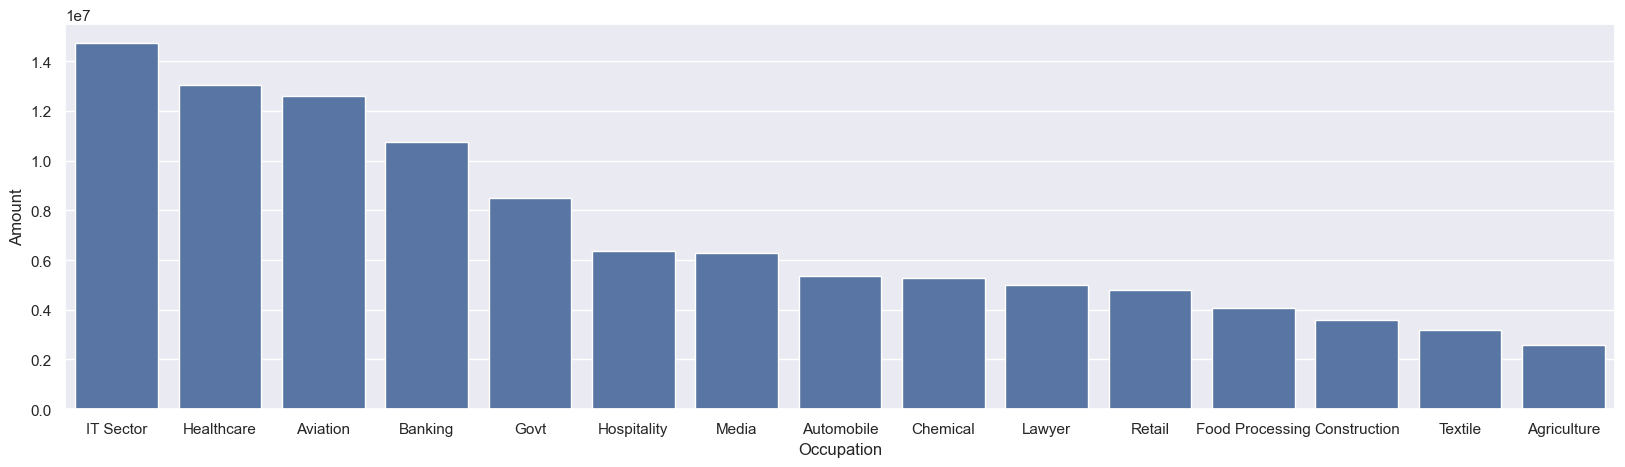

In [61]:
# plotting a bar graph for Total Amount spent vs Occupation
sales_occ = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_occ, x = 'Occupation',y= 'Amount')

#### We can conclude that most of the buyers are working in IT Sector followed by Healthcare and Aviation.

### Analysis on Product Category

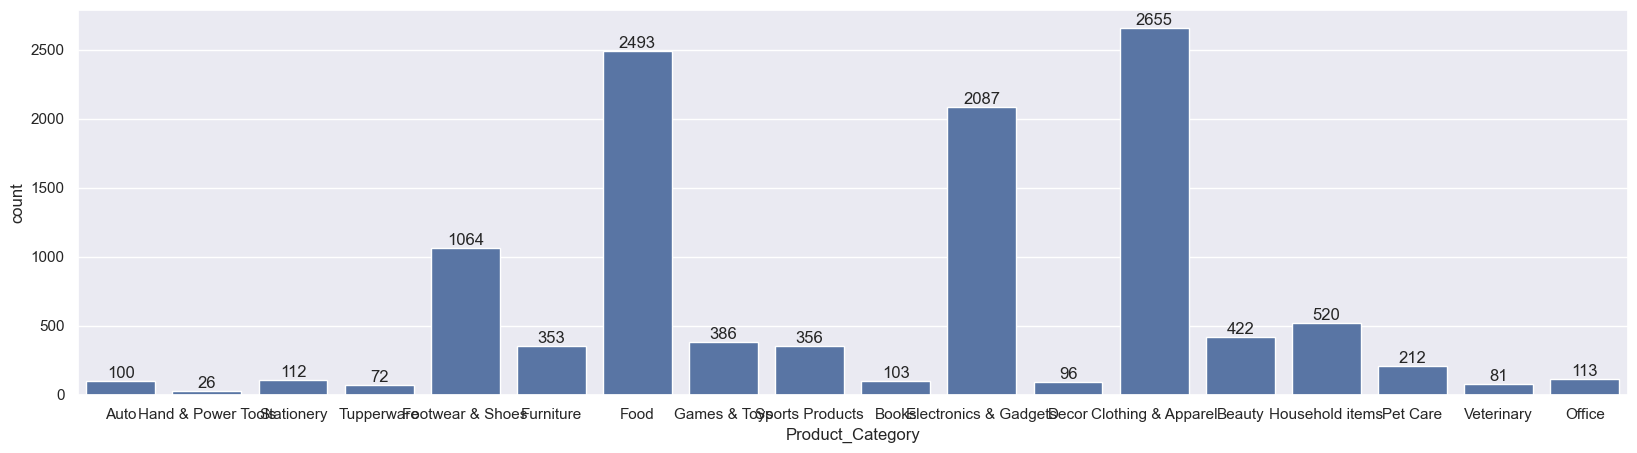

In [84]:
# plotting bar graph for Number of Orders of each Product Category
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

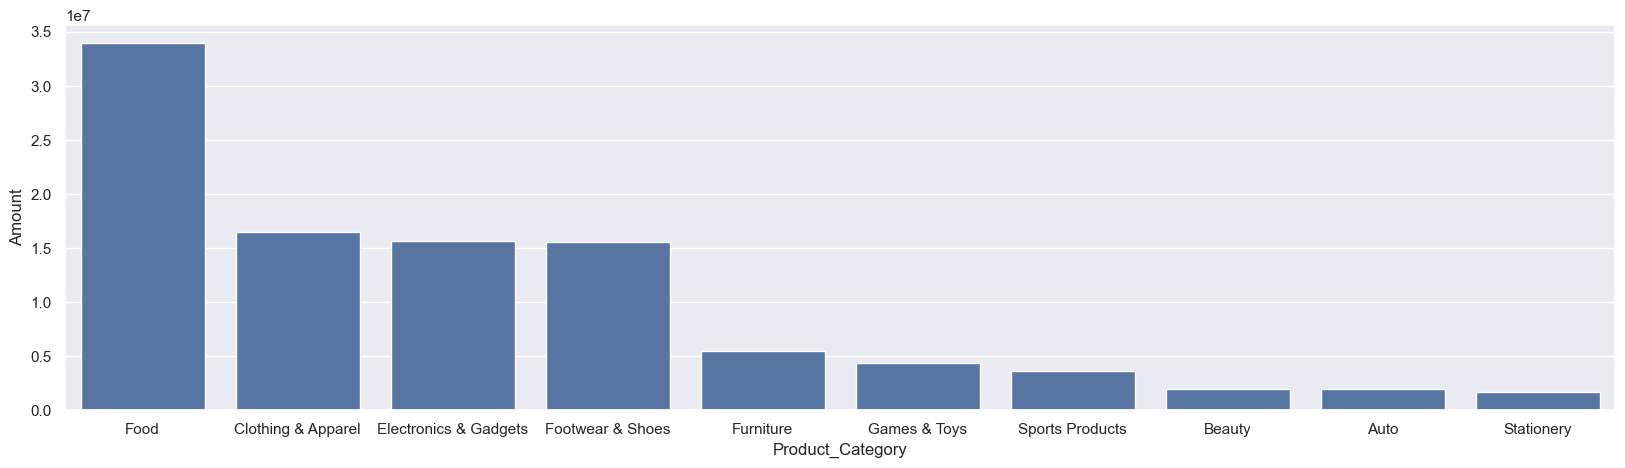

In [64]:
# plotting bar graph for Total Amount spent on each Product Category
sales_cat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_cat, x = 'Product_Category',y= 'Amount')

#### We can conclude that most selling Product Categories are Food, Clothing & Apparel and Electronics & Gadgets.

## Conclusion

#### Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.